# Importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
## The above libraries are needed for performing the machine learning and evaluating the machine learning models.


In [3]:
## Reading the data in using pd.read_csv as the dataset is in the csv format.
df = pd.read_csv('train.csv')

In [4]:
## Viewing the dataset.
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [ ]:
## The dataset has the following columns User_ID, Product_ID, Gender, Age, Occupation, City_Category, 
## Stay_In_Current_City_Years, Marital_Status, Product_Category_1, Product_Category_2, Product_Category_3 and
## Purchase

# Data Understanding

In [5]:
## The dataframe has 550068 rows and 12 columns
df.shape

(550068, 12)

In [6]:
## The describe function shows us the descriptive statistics of our data and the shape of dataset distribution
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
## Using the info function we can see below that there are a few null values present in Product_Category_3 column
## And we can also see the types of variables present in these columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [8]:
## The isnull().sum() function will help in finding all the null values present in the columns
## There are 173638 missing values and 383247 missing values in the Product_Category_2 and Product_Category_3 columns
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

# Data Visualization

In [ ]:
## The countplot shows the occurrences of the gender in the dataset.

<AxesSubplot:xlabel='Gender', ylabel='count'>

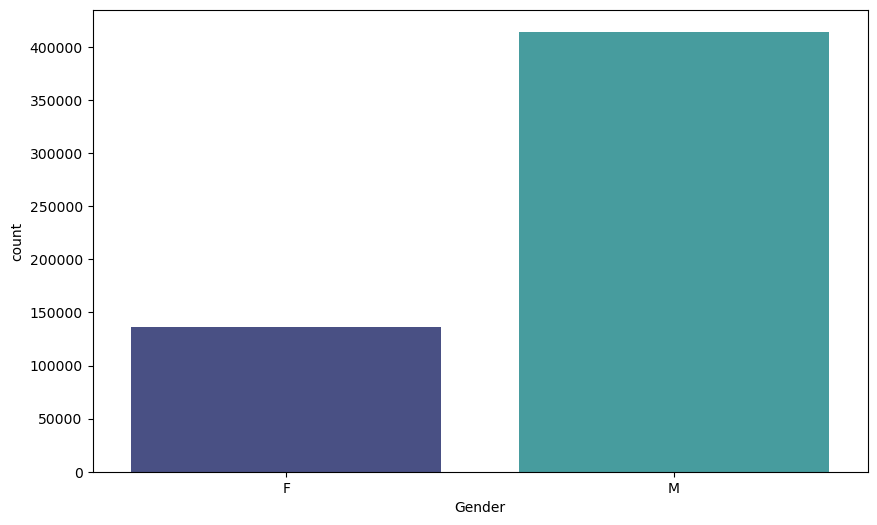

In [9]:
## The count of Male gender is higher as compared to the Female gender
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Gender' , palette='mako')

<AxesSubplot:xlabel='Gender', ylabel='Marital_Status'>

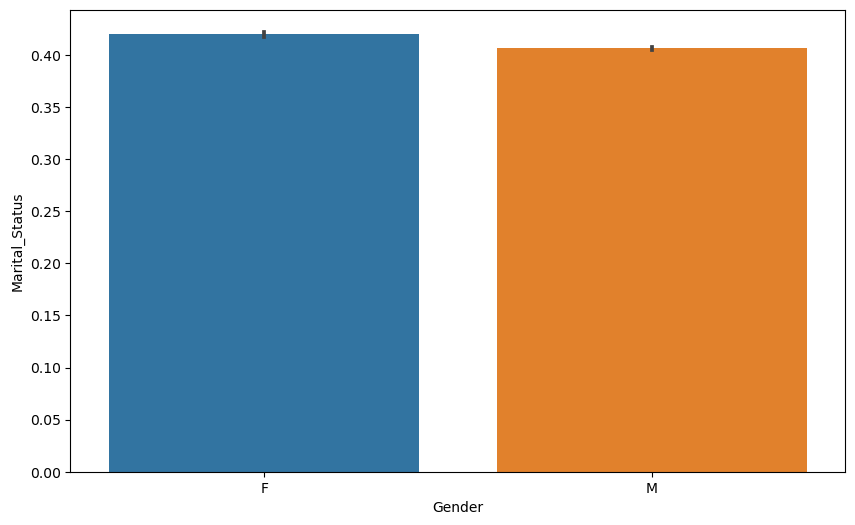

In [11]:
## The below visualization shows us the Female gender is slightly higher compared to the Male gender. 
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender' , y= 'Marital_Status', data=df)

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

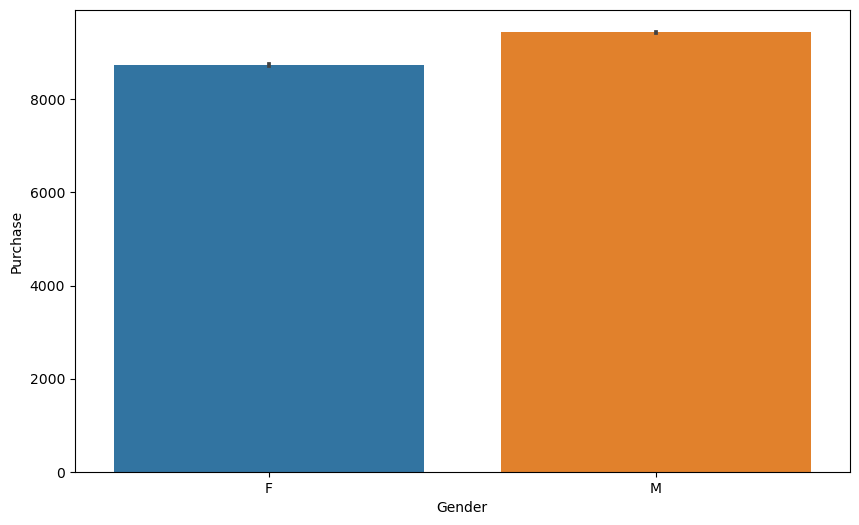

In [12]:
## Higher purchases have been done by the Male gender as compared to the Female gender
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender' , y= 'Purchase', data=df)

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

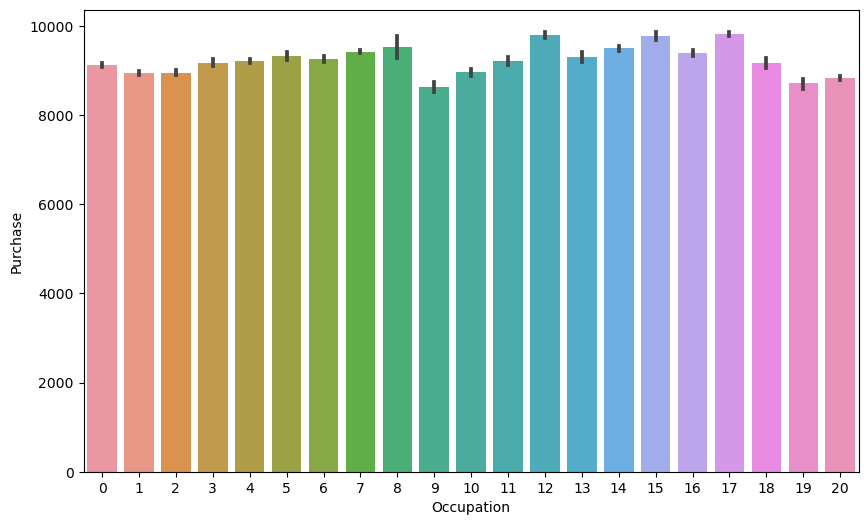

In [13]:
## Occupation has a direct effect on the purchases done by the customer and the occupation codes 12,15,17 have higher purchases.
plt.figure(figsize=(10, 6))
sns.barplot(x='Occupation' , y= 'Purchase', data=df)

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

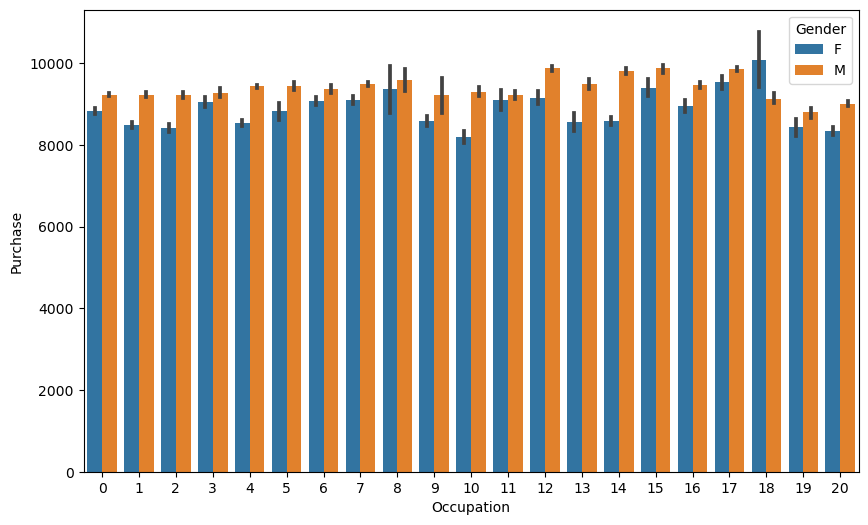

In [14]:
## In tis graph it can be seen that the Female gender in the occupation 18 with higher purchases compared to others.
plt.figure(figsize=(10, 6))
sns.barplot(x='Occupation' , y= 'Purchase', hue='Gender', data=df)

# Outlier Detection

## Checking the presence of outliers using Boxplot

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

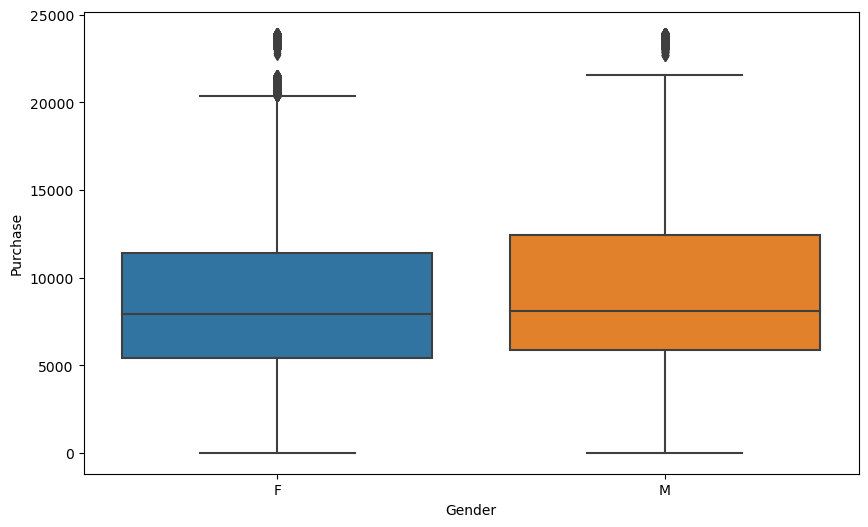

In [15]:
## Using boxplot we can detect the presence of outliers in the data.
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender' , y= 'Purchase', data=df)

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

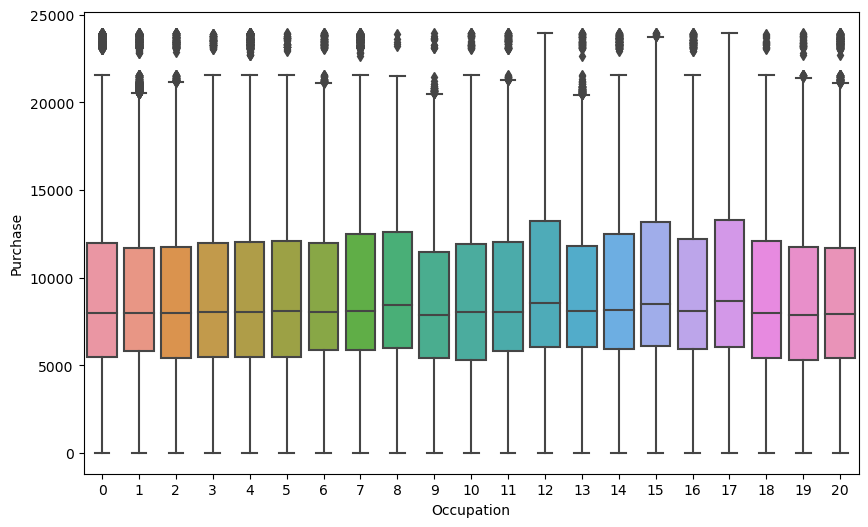

In [16]:
## The purchase column has outliers which may effect the performance of the machine learning models.
plt.figure(figsize=(10, 6))
sns.boxplot(x='Occupation' , y= 'Purchase', data=df)

### As we can see above there are outliers present in the Purchase column.

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

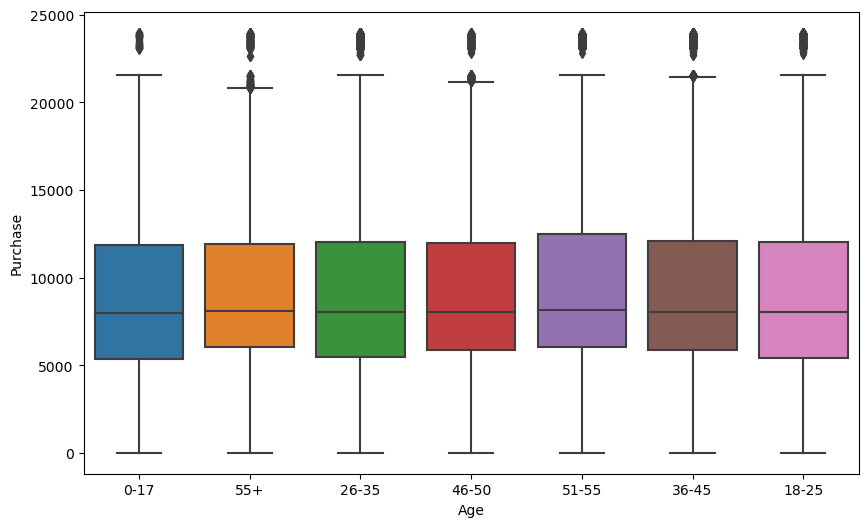

In [17]:
## We can see below that the Age with Purchases again have some outliers present in them.
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age' , y= 'Purchase', data=df)

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

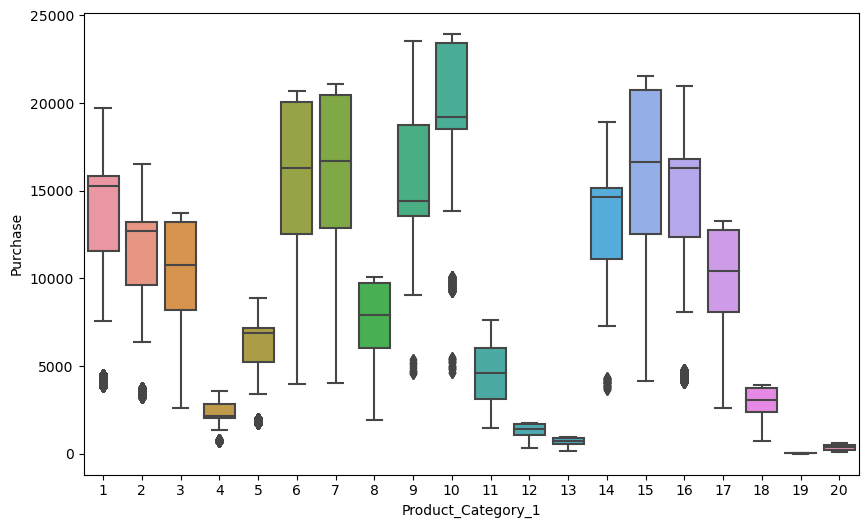

In [18]:
## There are outliers present in the Product Category as well.
plt.figure(figsize=(10, 6))
sns.boxplot(x='Product_Category_1' , y= 'Purchase', data=df)

# Data Preprocessing

In [ ]:
## Data preprocessing is a data mining technique which is used to transform the raw data in a useful and efficient format.

In [19]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [20]:
## Replacing 'P00' with no value and scaling the ProductID column. 
df['Product_ID'] = df['Product_ID'].str.replace('P00', '')
ss = StandardScaler()
df['Product_ID'] = ss.fit_transform(df['Product_ID'].values.reshape(-1, 1))

In [21]:
## There are more than 50 percent missing values present in the Product_Category_Column so we will drop that column
df.drop(['Product_Category_3'], axis=1,inplace=True)

In [22]:
## The missing data in the Product_Category_2 column has been imputed using mean.
df['Product_Category_2']=df["Product_Category_2"].fillna(df['Product_Category_2'].mean())

In [23]:
## The missing values have been successfully imputed and now there are no null values present in the dataset.
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

In [24]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,-1.028774,F,0-17,10,A,2,0,3,9.842329,8370
1,1000001,0.722139,F,0-17,10,A,2,0,1,6.000000,15200
2,1000001,-0.845799,F,0-17,10,A,2,0,12,9.842329,1422
3,1000001,-0.869157,F,0-17,10,A,2,0,12,14.000000,1057
4,1000002,1.077382,M,55+,16,C,4+,0,8,9.842329,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,1.924156,M,51-55,13,B,1,1,20,9.842329,368
550064,1006035,1.953267,F,26-35,1,C,3,0,20,9.842329,371
550065,1006036,1.953267,F,26-35,15,B,4+,1,20,9.842329,137
550066,1006038,1.953267,F,55+,1,C,2,0,20,9.842329,365


## Label Encoding is a technique used to turn categorical variables to numeric values. 

In [27]:
## The label encoding technique will now replace all the categorical variables to numeric for easier computation.
cat_cols=['Gender','City_Category','Age']
le=LabelEncoder()
for i in cat_cols:
    df[i]=le.fit_transform(df[i])
df.dtypes

User_ID                         int64
Product_ID                    float64
Gender                          int64
Age                             int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Purchase                        int64
dtype: object

In [28]:
## Values in the Stay_In_Current_City_Years column has been change from 4+ to 4.
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].replace('4+','4')

In [29]:
## The Gender, Age, and Stay_In_Current_City_Years values are changed to integer types.
df['Gender']=df['Gender'].astype(int)
df['Age']=df['Age'].astype(int)
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)

In [30]:
## The type of city_category has been changed from int to category.
df['City_Category']=df['City_Category'].astype('category')

In [31]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,-1.028774,0,0,10,0,2,0,3,9.842329,8370
1,1000001,0.722139,0,0,10,0,2,0,1,6.000000,15200
2,1000001,-0.845799,0,0,10,0,2,0,12,9.842329,1422
3,1000001,-0.869157,0,0,10,0,2,0,12,14.000000,1057
4,1000002,1.077382,1,6,16,2,4,0,8,9.842329,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,1.924156,1,5,13,1,1,1,20,9.842329,368
550064,1006035,1.953267,0,2,1,2,3,0,20,9.842329,371
550065,1006036,1.953267,0,2,15,1,4,1,20,9.842329,137
550066,1006038,1.953267,0,6,1,2,2,0,20,9.842329,365


## Distribution plot

### The distribution plot shows us how the overall data is distributed in the dataframe.

### In probability therory and statistics, skewness is a measure of the asymmetry of the probability   distribution of a real-valued random variable about its mean. The skewness value can be positive, zero, negative, or undefined. For unimodal distribution, negative skew commonly indicates that the tail is on the left side of the distribution and positive skew indicates that the tail is on the right. In cases where one tail is long but the other tail is fat, skewness does not obey a simple rule. For example, a zero value means taht the tails on both sides of the mean balance out overall; this is the case for a symmetric distribution, but can also be true for an asymmetric distribution where one tail is long and thin, and the other is short but fat. 

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

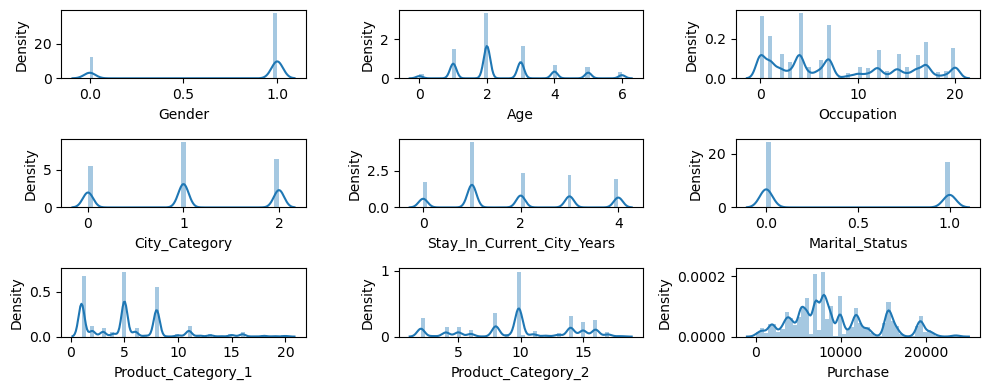

In [34]:
## The distribution plot helps us to detect the skewness of the data. Below as it can be seen that the purchase column
rows=3
cols=3
fig, ax=plt.subplots(nrows=rows,ncols=cols, figsize=(10,4))
col=df.columns
index=2
for i in range(rows):
    for j in range(cols):
        sns.distplot(df[col[index]], ax=ax[i][j])
        index=index+1
        
plt.tight_layout()


## Log transformation 

### The log transformation is, arguably, the most popular among the different types of transfromations used to transform skewed data to approximately conform to normality. If the original data follows a log-normal distribution  or approximately so, then the log-transformed data follows a normal or near normal distribution

In [36]:
## The log transformation will help us transform the data and change the data to normal distribution
df['Purchase']=np.log(df['Purchase'])

In [ ]:
### working will finish soon